In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

# make qutip available in the rest of the notebook
from qutip import *

from scipy.constants import k, h, mu_0, e
from scipy.special import ellipk

phi_0 = h/2/e # For superconductor

pi = np.pi

from numpy.fft import rfft, ifft, fft, irfft
plt.style.use('genstyle')

from matplotlib.ticker import FormatStrFormatter, MaxNLocator

import os
os.getcwd()

'/Users/lulu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhD thesis/Majorana Simulation'

In [2]:
from numpy.fft import rfft, ifft, fft, irfft
from qutip import *
from scipy.optimize import curve_fit
from numpy import sin as sin
from numpy import cos as cos
from numpy import exp as exp
from numpy import argmin as argmin
from numpy import argmax as argmax
from numpy import power as power
from numpy import sqrt as sqrt
pi = np.pi

def fourier_expansion(x, data, norm='forward', mode='zeroed', plot=True, res=1e-2):
    if mode=='zeroed':
        mean = np.mean(data)
    else:
        mean = 0
    X = fft(data - mean, norm=norm)
    freq = np.fft.fftfreq(len(x), d=(max(x)-min(x))/2/np.pi/len(x))
    
    if plot:
        
        fig, ax = plt.subplots()
        ax.plot(x/np.pi, data, 'b')
        ax.plot(x/np.pi, ifft(X, norm=norm)+mean, 'r*')
        ax.set_xlabel(r'$\phi$/$\pi$')
        ax.set_ylabel('FFT Amplitude |X(freq)|')        

        fig, ax = plt.subplots()
        ax.plot(freq, 2*np.abs(X), 'b*')
        minimum = 2*min(np.abs(X))
        maximum = 2*max(np.abs(X))
        ran = maximum - minimum
        ax.set_xlabel('Freq (Hz)')
        ax.set_ylabel('FFT Amplitude |X(freq)|')
        ax.set_xlim(xmin=-0.1, xmax=10)
        ax.set_ylim(ymin=minimum-0.1*ran, ymax=maximum+0.1*ran)
    
    #X = np.abs(X)
    X[abs(X)<res] = 0
    
    return freq, X

def find_Ej(freq, X, size=5):
    Ej = 0
    if size > len(X)//2+1:
        size = len(X)//2+1
    for i in range(size):
        Ej += 2*freq[i]**2*np.abs(X[i])
    return Ej

def basis_func(f, x, arr):
    #print(int(f))
    return (x+0j)*np.exp(1j*f*arr)



def Ej_basis(i, N=10):
    if i==0:
        return 0.5*np.ones((2*N+1, 2*N+1))
    return np.diag(-np.ones(2*N+1-np.abs(i)), i) #+  np.diag(-np.ones(2*N+1-i), -i))

def SNS(phi, tau_list, sc_gap=1):
    Ejs = []
    for p in phi:
        Ej = np.sum(np.dot(sc_gap, np.sqrt(1-tau_list*np.sin(p/2)**2)))
        #print(Ej)
        Ejs.append(Ej)
    return np.array(Ejs)

def E_m(phi, Em=1):
    return -Em*np.cos(phi/2)

def SIS(phi, Ej=1):
    return Ej*np.cos(phi)

def SIS_squid(flux_n, d, Ej0=1):
    #return -Ej*np.cos(pi*flux_n)*np.sqrt(1+(d*np.tan(pi*flux_n))**2)
    return Ej0*np.sqrt(np.cos(pi*flux_n)**2 + d**2*np.sin(pi*flux_n)**2)

def Em_squid(flux_n, d, Em=1):
    return Em*np.sqrt(np.cos(pi*flux_n/2)**2 + d**2*np.sin(pi*flux_n/2)**2)

def SIS_squid_flux(flux_n, p, d=0, Ej0=1):
    Ej1 = Ej0/2*(1+d)
    Ej2 = Ej0/2*(1-d)
    return SIS(p, Ej=Ej1) + SIS(p-2*pi*flux_n, Ej=Ej2)

def SNS_squid_flux(flux_n, p, tau_list1, tau_list2, d=0, sc_gap=1):
    sc_gap1 = sc_gap/2*(1+d)
    sc_gap2 = sc_gap/2*(1-d)
    return SNS(p, tau_list1, sc_gap=sc_gap1) + SNS(p-2*pi*flux_n, tau_list2, sc_gap=sc_gap2)

def E_m_squid_flux(flux_n, p, Em=1, d=0):
    Em1 = Em/2*(1+d)
    Em2 = Em/2*(1-d)
    return E_m(p, Em1) + E_m(p-2*pi*flux_n, Em2)

def find_Ic(Energies, phi):
    I = np.gradient(Energies, phi)
    #return h/2/e*max(I)
    return max(I)

def E_m_updated(flux_n, p, Em=1, d=0):
    return -Em*np.cos(p/2)*np.cos((p-pi*flux_n)/2)

# Josephson junctions

## SNS junction

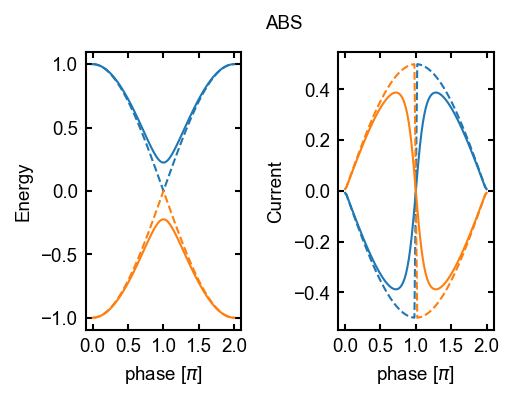

In [109]:
tau_list = 1*np.ones(1)
phase = np.linspace(0, 2*pi, 101)

fig, axes = plt.subplots(1,2, sharex=True)

data = SNS(phase, tau_list=tau_list)
axes[0].plot(phase/pi, data, 'C0--')
axes[0].plot(phase/pi, -data, 'C1--')

tau_list = 0.95*np.ones(1)
data = SNS(phase, tau_list=tau_list)
axes[0].plot(phase/pi, data, 'C0')
axes[0].plot(phase/pi, -data, 'C1')
axes[0].set_xlabel(r'phase [$\pi$]')
axes[0].set_ylabel('Energy')

tau_list = 1*np.ones(1)
data = SNS(phase, tau_list=tau_list)
I = np.gradient(data, phase)
axes[1].plot(phase/pi, I, 'C0--')
axes[1].plot(phase/pi, -I, 'C1--')

tau_list = 0.95*np.ones(1)
data = SNS(phase, tau_list=tau_list)
I = np.gradient(data, phase)
axes[1].plot(phase/pi, I, 'C0')
axes[1].plot(phase/pi, -I, 'C1')
axes[1].set_xlabel(r'phase [$\pi$]')
axes[1].set_ylabel('Current')

axes[1].xaxis.set_major_locator(MaxNLocator(nbins=5))

fig.text(0.55, 1.02, 'ABS', ha='center', va='center')


fig.savefig('ABS_junction.pdf')
#spectrums = np.array(spectrums).T
#plt.plot(ng, spectrums)
#plot_spectrum(ng, spectrums,cutoff=4)

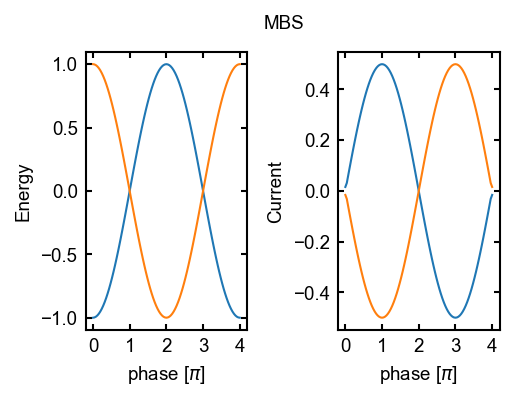

In [103]:
tau_list = 1*np.ones(1)
phase = np.linspace(0, 4*pi, 101)

fig, axes = plt.subplots(1,2, sharex=True)

data = E_m(phase)
axes[0].plot(phase/pi, data, 'C0')
axes[0].plot(phase/pi, -data, 'C1')
axes[0].set_xlabel(r'phase [$\pi$]')
axes[0].set_ylabel('Energy')


data = E_m(phase)
I = np.gradient(data, phase)
axes[1].plot(phase/pi, I, 'C0')
axes[1].plot(phase/pi, -I, 'C1')
axes[1].set_xlabel(r'phase [$\pi$]')
axes[1].set_ylabel('Current')

axes[1].xaxis.set_major_locator(MaxNLocator(nbins=5))
fig.text(0.55, 1.02, 'MBS', ha='center', va='center')
fig.savefig('MBS_junction.pdf')
#spectrums = np.array(spectrums).T
#plt.plot(ng, spectrums)
#plot_spectrum(ng, spectrums,cutoff=4)

## SQUIDS

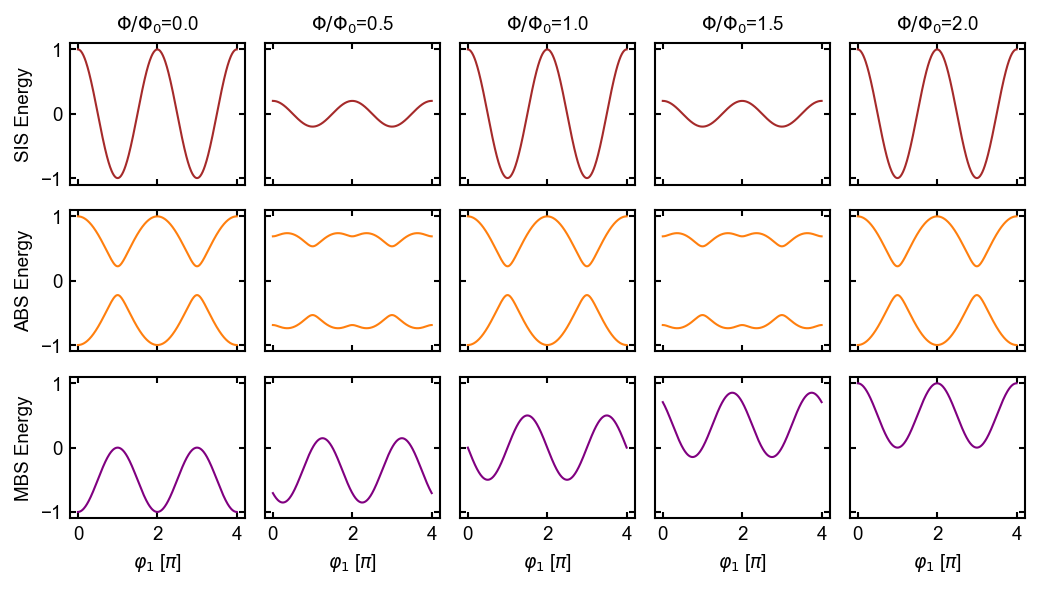

In [39]:
fig, axes = plt.subplots(3,5, figsize=(7,4), sharex=True, sharey=True)

#axins = ax.inset_axes([0.53,0.25,0.37,0.37])



n_bal = 1
tau_list = 0.95*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)
d = 0.2

n = 0
data_SIS = SIS_squid_flux(n, phase, d=d)
data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
data_Em = E_m_updated(n, phase, d=d)
axes[0][0].plot(phase/pi, data_SIS, 'brown')
axes[1][0].plot(phase/pi, data_SNS, 'C1')
axes[1][0].plot(phase/pi, -data_SNS, 'C1')
axes[2][0].plot(phase/pi, data_Em, 'purple')


n = 1/2
data_SIS = SIS_squid_flux(n, phase, d=d)
data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
data_Em = E_m_updated(n, phase, d=d)
axes[0][1].plot(phase/pi, data_SIS, 'brown')
axes[1][1].plot(phase/pi, data_SNS, 'C1')
axes[1][1].plot(phase/pi, -data_SNS, 'C1')
axes[2][1].plot(phase/pi, data_Em, 'purple')

n = 1
data_SIS = SIS_squid_flux(n, phase, d=d)
data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
data_Em = E_m_updated(n, phase, d=d)
axes[0][2].plot(phase/pi, data_SIS, 'brown')
axes[1][2].plot(phase/pi, data_SNS, 'C1')
axes[1][2].plot(phase/pi, -data_SNS, 'C1')
axes[2][2].plot(phase/pi, data_Em, 'purple')

n = 3/2
data_SIS = SIS_squid_flux(n, phase, d=d)
data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
data_Em = E_m_updated(n, phase, d=d)
axes[0][3].plot(phase/pi, data_SIS, 'brown')
axes[1][3].plot(phase/pi, data_SNS, 'C1')
axes[1][3].plot(phase/pi, -data_SNS, 'C1')
axes[2][3].plot(phase/pi, data_Em, 'purple')

n = 2
data_SIS = SIS_squid_flux(n, phase, d=d)
data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
data_Em = E_m_updated(n, phase, d=d)
axes[0][4].plot(phase/pi, data_SIS, 'brown')
axes[1][4].plot(phase/pi, data_SNS, 'C1')
axes[1][4].plot(phase/pi, -data_SNS, 'C1')
axes[2][4].plot(phase/pi, data_Em, 'purple')

i=0
for ax in axes[0]:
    ax.set_title(r'$\Phi/\Phi_0$={:.1f}'.format(i/2))
    i+=1

for ax in axes[2]:
    ax.set_xlabel(r'$\varphi_1$ [$\pi$]')
axes[0][0].set_ylabel('SIS Energy')
axes[1][0].set_ylabel('ABS Energy')
axes[2][0].set_ylabel('MBS Energy')
fig.tight_layout()
#fig.savefig('Squid_flux_periodicity.pdf')
#fig.text(0.0, 0.5, 'Energy', ha='center', va='center', rotation='vertical')

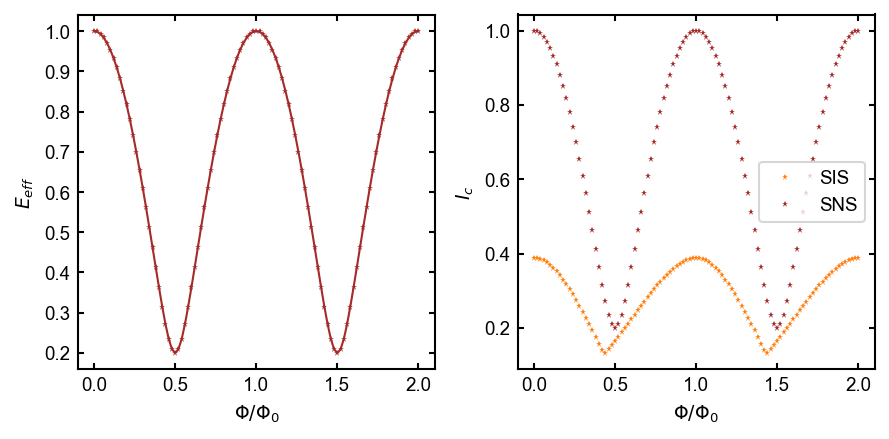

In [18]:
fig, axes = plt.subplots(1,2,figsize=(6,3))


n_bal = 1
tau_list = 0.95*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)
d = 0.2



i = 0
Ic_SIS = []
Ic_SNS = []
Ic_MBS = []
Ej_SIS = []
Ej_MBS = []


for n in flux_n:
    data_SIS = SIS_squid_flux(n, phase, d=d)
    data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
    data_Em = E_m_squid_flux(n, phase, d=d)
    Ic_SIS.append(find_Ic(data_SIS, phase))
    Ic_SNS.append(find_Ic(data_SNS, phase))
    Ic_MBS.append(find_Ic(data_Em, phase))

    freq, X = fourier_expansion(phase, data_SIS, mode='none', norm='forward', plot=False, res=1e-2)
    Ej_SIS.append(2*np.abs(X)[2])
    freq, X = fourier_expansion(phase, data_Em, mode='none', norm='forward', plot=False, res=1e-2)
    Ej_MBS.append(2*np.abs(X)[1])



axes[0].plot(flux_n, Ej_SIS, '*', c='brown')
#axes[0].plot(flux_n, Ej_MBS, '*', c='purple')
axes[0].plot(flux_n, SIS_squid(flux_n, d), 'brown')
#axes[0].plot(flux_n, Em_squid(flux_n, d), 'purple')
axes[1].plot(flux_n, Ic_SNS, '*', c='C1', label='SIS')
axes[1].plot(flux_n, Ic_SIS, '*', c='brown', label='SNS')
#axes[1].plot(flux_n, Ic_MBS, '*', c='purple', label='MBS')

axes[0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axes[1].xaxis.set_major_locator(MaxNLocator(nbins=5))

axes[1].legend()


axes[0].set_ylabel(r'$E_{{eff}}$')
axes[1].set_ylabel(r'$I_c$')
axes[0].set_xlabel(r'$\Phi/\Phi_0$')
axes[1].set_xlabel(r'$\Phi/\Phi_0$')
fig.tight_layout()
fig.savefig('squid_flux_tuning.pdf')

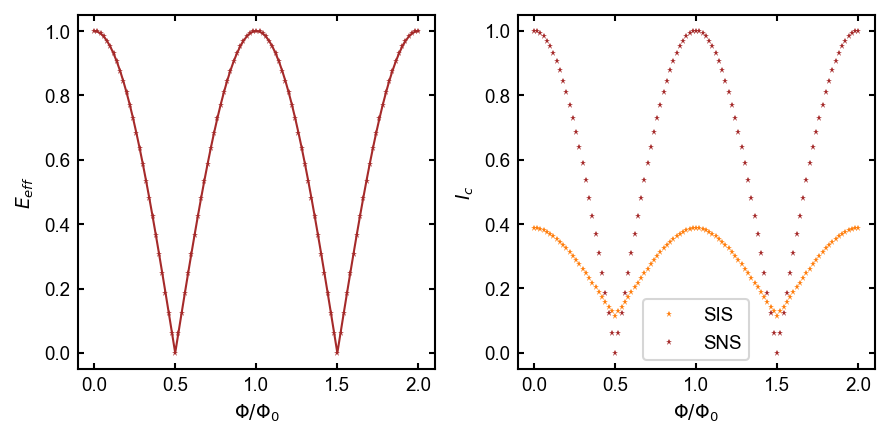

In [19]:
fig, axes = plt.subplots(1,2,figsize=(6,3))


n_bal = 1
tau_list = 0.95*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)
d = 0



i = 0
Ic_SIS = []
Ic_SNS = []
Ic_MBS = []
Ej_SIS = []
Ej_MBS = []


for n in flux_n:
    data_SIS = SIS_squid_flux(n, phase, d=d)
    data_SNS = SNS_squid_flux(n, phase, tau_list, tau_list, d=d)
    data_Em = E_m_squid_flux(n, phase, d=d)
    Ic_SIS.append(find_Ic(data_SIS, phase))
    Ic_SNS.append(find_Ic(data_SNS, phase))
    Ic_MBS.append(find_Ic(data_Em, phase))

    freq, X = fourier_expansion(phase, data_SIS, mode='none', norm='forward', plot=False, res=1e-2)
    Ej_SIS.append(2*np.abs(X)[2])
    freq, X = fourier_expansion(phase, data_Em, mode='none', norm='forward', plot=False, res=1e-2)
    Ej_MBS.append(2*np.abs(X)[1])



axes[0].plot(flux_n, Ej_SIS, '*', c='brown')
#axes[0].plot(flux_n, Ej_MBS, '*', c='purple')
axes[0].plot(flux_n, SIS_squid(flux_n, d), 'brown')
#axes[0].plot(flux_n, Em_squid(flux_n, d), 'purple')
axes[1].plot(flux_n, Ic_SNS, '*', c='C1', label='SIS')
axes[1].plot(flux_n, Ic_SIS, '*', c='brown', label='SNS')
#axes[1].plot(flux_n, Ic_MBS, '*', c='purple', label='MBS')

axes[0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axes[1].xaxis.set_major_locator(MaxNLocator(nbins=5))

axes[1].legend()


axes[0].set_ylabel(r'$E_{{eff}}$')
axes[1].set_ylabel(r'$I_c$')
axes[0].set_xlabel(r'$\Phi/\Phi_0$')
axes[1].set_xlabel(r'$\Phi/\Phi_0$')
fig.tight_layout()
fig.savefig('squid_flux_tuning_sym.pdf')

/Users/lulu/anaconda3/envs/phd/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


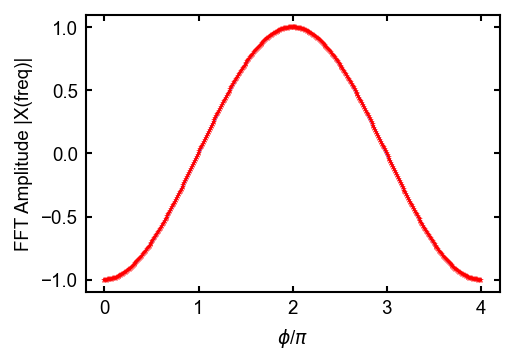

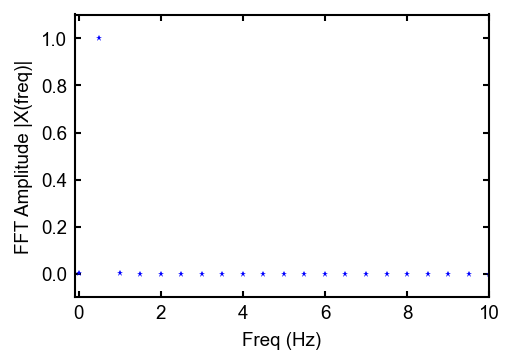

In [64]:
freq, X = fourier_expansion(phase, data_Em, mode='none', norm='forward', plot=True, res=1e-2)

# Transmon Qubit

In [3]:
N=15

def H_c(Ec, ng=0, N=15):
    return Qobj(np.diag(Ec * (np.arange(-N,N+1)-ng)**2))


def Ej_basis(i, N=15):
    if i==0:
        return 0.5*np.ones((2*N+1, 2*N+1))
    return np.diag(-np.ones(2*N+1-np.abs(i)), i) #+  np.diag(-np.ones(2*N+1-i), -i))

def H_J(freq, X, N=15, size=10):
    H_j = (0+0j)*np.ones((2*N+1, 2*N+1))
    for i in range(size):
        H_j += X[i]*Ej_basis(i, N=N)
        if i!=0:
            H_j += X[-i]*Ej_basis(-i, N=N)
    return Qobj(H_j)

def H_J_SIS(Ej, N=15):
    return - Qobj(0.5 * Ej * (np.diag(np.ones(2*N-1), 2) + np.diag(np.ones(2*N-1), -2)))

def H_M(Em, N=15):
    return - Qobj(0.5 * Em * (np.diag(np.ones(2*N), 1) + np.diag(np.ones(2*N), -1)))

def E_j(Ej0, flux_n, d=0, phase_shift=0):
    phase = flux_n*np.pi + phase_shift
    return Ej0*np.sqrt(np.cos(phase)**2+d**2*np.sin(phase)**2)

def H_J_SIS_SQUID(flux_n, Ej_max, d=0, phase_shift=0, N=15):
    return H_J_SIS(E_j(Ej_max, flux_n, d=d, phase_shift=phase_shift), N=N)

def H_M_SQUID(flux_n, Em0, d=0, N=15):
    return H_M(Em_squid(flux_n, d=d, Em=Em0), N=N)

def fq(H):
    energies = H.eigenenergies()
    return np.abs(energies[2]-energies[0])

def f_c_I(flux_n, fc, fqs, Ej0,d):
    return (fc+fqs)/2-sqrt(g(flux_n,fc,Ej0,d)**2+(fqs-fc)**2/4)

def g(flux_n, fc, Ej0, d):
    return g0*fc*np.power(Ej0, 1/4)*np.power(cos(np.pi*flux_n)**2+d**2*sin(np.pi*flux_n)**2, 1/8)

def f_q_ana(flux_n, Ej, d, n_shift=0, N=15):
    fq_ana = []
    for n in flux_n:
        H_J_ana = H_J_SIS_SQUID(n, Ej, d=d, N=N)
        H_ana = H_J_ana + H_c(Ec, N=N)
        fq_ana.append(fq(H_ana))
    return np.array(fq_ana)

def f_c_ana(flux_n, fc, Ej0, d, n_shift=0, N=15):
    return f_c_I(flux_n, fc, f_q_ana(flux_n, Ej0, d, n_shift=n_shift, N=N), Ej0, d)

def plot_spectrum(x_var, spectrums, cutoff=2, fig=None, ax=None):
    transitions = []
#    for s in spectrums:
#        print(s-ref)
#        transitions.append(s-ref)
#        ref = s
    transitions = np.array(spectrums).T
    plot_data = transitions[0:cutoff]
    #ref = transitions[0]
    ref = 0
    for d in plot_data:
        if ax:
            ax.plot(x_var, d-ref)
        else:
            fig, ax = plt.subplots()
            ax.plot(x_var, d-ref)
    return fig, ax, plot_data

## Fixed-frequency Transmon

Text(0, 0.5, 'Energy Spectrum')

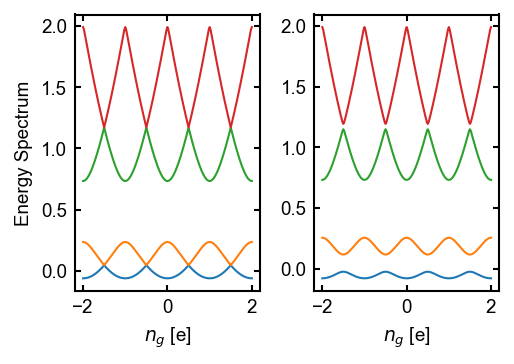

In [206]:
#Ec = 10e9
Ec = 0.5
Ej = 0.5
Em = 0

fig, axes = plt.subplots(1,2)

ng = np.linspace(-2,2,201)
fqs = []
spectrums = []
for n in ng:
    H = H_c(Ec, ng=n) + H_J_SIS(Ej) + H_M(Em)
    fqs.append(fq(H))
    spectrums.append(H.eigenenergies())
plot_spectrum(ng, spectrums,cutoff=4, fig=fig, ax=axes[0])

Em = 0.1
fqs = []
spectrums = []
for n in ng:
    H = H_c(Ec, ng=n) + H_J_SIS(Ej) + H_M(Em)
    fqs.append(fq(H))
    spectrums.append(H.eigenenergies())
plot_spectrum(ng, spectrums,cutoff=4, fig=fig, ax=axes[1])
axes[0].set_xlabel(r'$n_g$ [e]')
axes[1].set_xlabel(r'$n_g$ [e]')
axes[0].set_ylabel('Energy Spectrum')

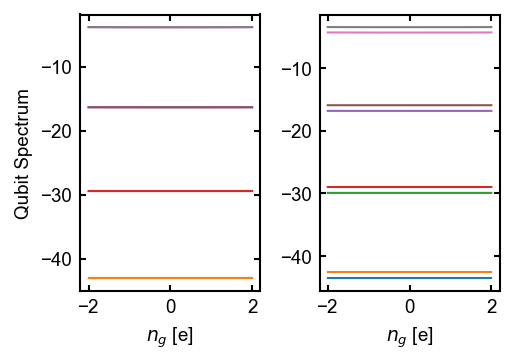

In [198]:
#Ec = 10e9
Ec = 0.5
Ej = 50
Em = 0

fig, axes = plt.subplots(1,2)

ng = np.linspace(-2,2,201)
fqs = []
spectrums = []
for n in ng:
    H = H_c(Ec, ng=n) + H_J_SIS(Ej) + H_M(Em)
    fqs.append(fq(H))
    spectrums.append(H.eigenenergies())
plot_spectrum(ng, spectrums,cutoff=8, fig=fig, ax=axes[0])

Em = 0.5
fqs = []
spectrums = []
for n in ng:
    H = H_c(Ec, ng=n) + H_J_SIS(Ej) + H_M(Em)
    fqs.append(fq(H))
    spectrums.append(H.eigenenergies())
plot_spectrum(ng, spectrums,cutoff=8, fig=fig, ax=axes[1])
axes[0].set_xlabel(r'$n_g$ [e]')
axes[1].set_xlabel(r'$n_g$ [e]')
axes[0].set_ylabel('Qubit Spectrum')
fig.savefig('majorana_transmon.pdf')

## Flux_tunable Transmon

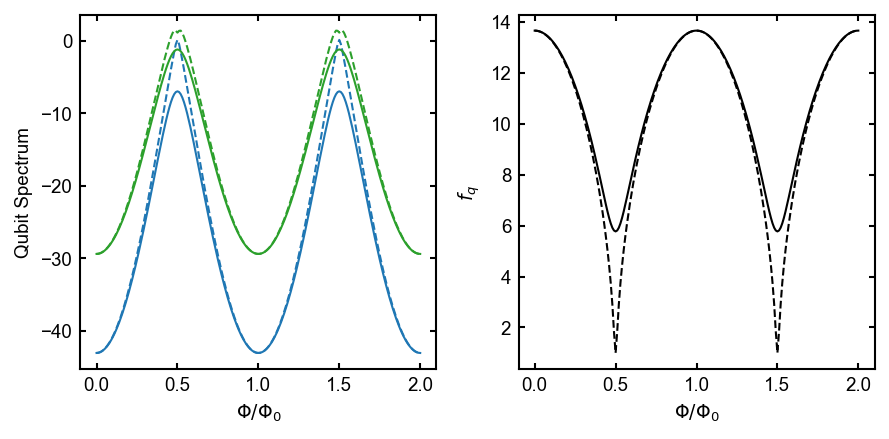

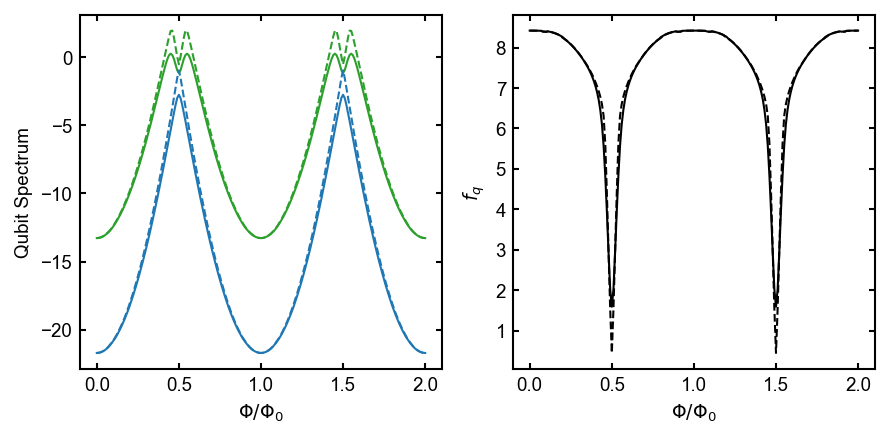

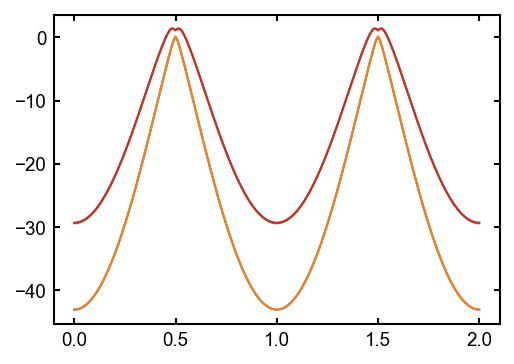

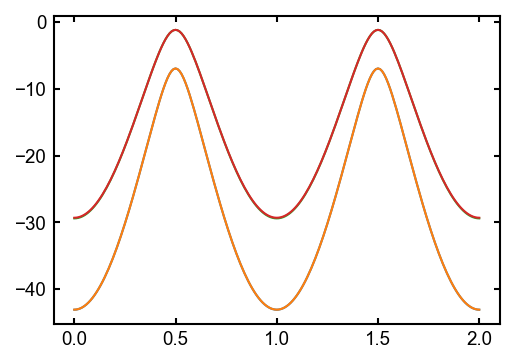

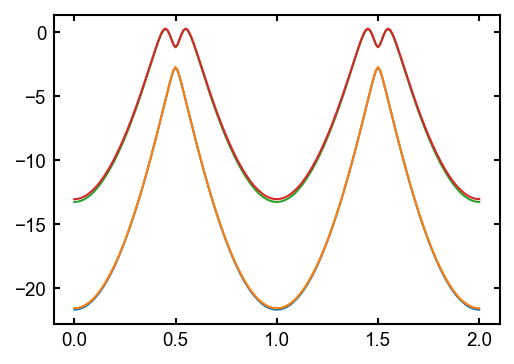

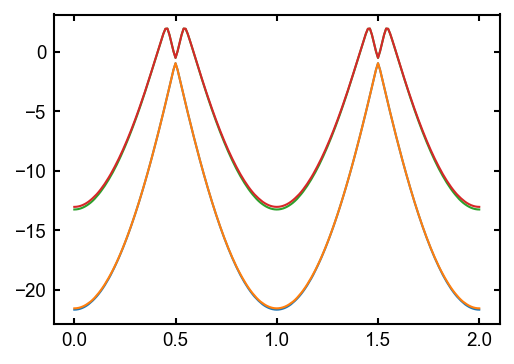

In [17]:
N=10
size = 10



n_bal = 1
tau_list = 0.95*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 201)

Ec = 0.5
Ej0 = 50
sc_gap = 80
d = 0.2
Em = 0

fig, axes = plt.subplots(1,2, figsize=(6,3))
fig1, axes1 = plt.subplots(1,2, figsize=(6,3))

ng = 0.5
fqs_SIS = []
fqs_SIS_sym = []
fqs_p = []
fqs_m = []
fqs_pm = []
fqs_pm_sym = []
fqs_mp = []

spectrums_SIS = []
spectrums_SNS = []
spectrums_SIS_MBS = []
spectrums_SNS_MBS = []
for n in flux_n:
    #data_tot = SNS_squid_flux(n,phase,tau_list,tau_list,d=d,sc_gap=sc_gap) + SIS_squid_flux(n,phase,d=d,Ej0=Ej0) + E_m_squid_flux(n,phase)
    data_tot = SNS_squid_flux(n,phase,tau_list,tau_list,d=d,sc_gap=sc_gap)
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)    
    H = H_c(Ec, ng=ng, N=N) + H_J(freq, X, N=N, size=size) #+ H_M_SQUID(n, Em, d=d, N=N)
    Ens = H.eigenenergies()
    spectrums_SNS_MBS.append(Ens)
    fqs_p.append(Ens[2] - Ens[1])
    fqs_m.append(Ens[3] - Ens[0])
    fqs_pm.append(Ens[2] - Ens[0])
    fqs_mp.append(Ens[3] - Ens[1])

    data_tot = SNS_squid_flux(n,phase,tau_list,tau_list,d=0,sc_gap=sc_gap)
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)    
    H = H_c(Ec, ng=ng, N=N) + H_J(freq, X, N=N, size=size) #+ H_M_SQUID(n, Em, d=d, N=N)
    Ens = H.eigenenergies()
    spectrums_SNS.append(Ens)
    fqs_p.append(Ens[2] - Ens[1])
    fqs_m.append(Ens[3] - Ens[0])
    fqs_pm_sym.append(Ens[2] - Ens[0])
    fqs_mp.append(Ens[3] - Ens[1])

    data_tot = SIS_squid_flux(n,phase,d=d,Ej0=Ej0) #+ E_m_squid_flux(n,phase,d=d,Em=Em)
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)    
    H = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, phase_shift=0, N=N)
    Ens = H.eigenenergies()
    spectrums_SIS_MBS.append(Ens)
    fqs_SIS.append(Ens[2] - Ens[0])

    data_tot = SIS_squid_flux(n,phase,d=0,Ej0=Ej0) #+ E_m_squid_flux(n,phase,d=d,Em=Em)
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)    
    H = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=0, phase_shift=0, N=N)
    Ens = H.eigenenergies()
    spectrums_SIS.append(Ens)
    fqs_SIS_sym.append(Ens[2] - Ens[0])
    

figy, ax, plot_data = plot_spectrum(flux_n, spectrums_SIS,cutoff=4)
#axes[0].plot(spectrums_SIS[:,0])
axes[0].plot(flux_n, plot_data[0], 'C0--')
axes[0].plot(flux_n, plot_data[2], 'C2--')
axes[1].plot(flux_n, fqs_SIS_sym, 'k--')
figy, ax, plot_data = plot_spectrum(flux_n, spectrums_SIS_MBS,cutoff=4)
#axes[0].plot(spectrums_SIS[:,0])
axes[0].plot(flux_n, plot_data[0], 'C0')
axes[0].plot(flux_n, plot_data[2], 'C2')
axes[1].plot(flux_n, fqs_SIS, 'k')


figy, ax, plot_data = plot_spectrum(flux_n, spectrums_SNS_MBS,cutoff=4)
#axes1[1].plot(flux_n, fqs_p, 'k', label=r'$f_{{q,+}}$')
#axes1[1].plot(flux_n, fqs_m, 'gray', label=r'$f_{{q,-}}$')
axes1[0].plot(flux_n, plot_data[0], 'C0')
axes1[0].plot(flux_n, plot_data[2], 'C2')
axes1[1].plot(flux_n, fqs_pm, 'k', label=r'$f_{{q,\pm}}$')


figy, ax, plot_data = plot_spectrum(flux_n, spectrums_SNS,cutoff=4)
#axes1[1].plot(flux_n, fqs_p, 'k', label=r'$f_{{q,+}}$')
#axes1[1].plot(flux_n, fqs_m, 'gray', label=r'$f_{{q,-}}$')
axes1[0].plot(flux_n, plot_data[0], 'C0--')
axes1[0].plot(flux_n, plot_data[2], 'C2--')
axes1[1].plot(flux_n, fqs_pm_sym, 'k--', label=r'$f_{{q,\pm}}$')
#axes1[1].plot(flux_n, fqs_mp, 'k--', label=r'$f_{{q,\mp}}$')
#axes1[1].legend()
#axes[0].plot(flux_n, spectrums_SIS, 'k')
#axes[0].plot(flux_n, fqs_SIS_1, 'k*')




axes[0].set_xlabel(r'$\Phi/\Phi_0$')
axes[1].set_xlabel(r'$\Phi/\Phi_0$')
axes1[0].set_xlabel(r'$\Phi/\Phi_0$')
axes1[1].set_xlabel(r'$\Phi/\Phi_0$')
axes[0].set_ylabel('Qubit Spectrum')
axes1[0].set_ylabel('Qubit Spectrum')
axes[1].set_ylabel(r'$f_q$')
axes1[1].set_ylabel(r'$f_q$')

fig.savefig('flux_tunable_transmon.pdf')
fig1.savefig('flux_tunable_Majorana_transmon.pdf')

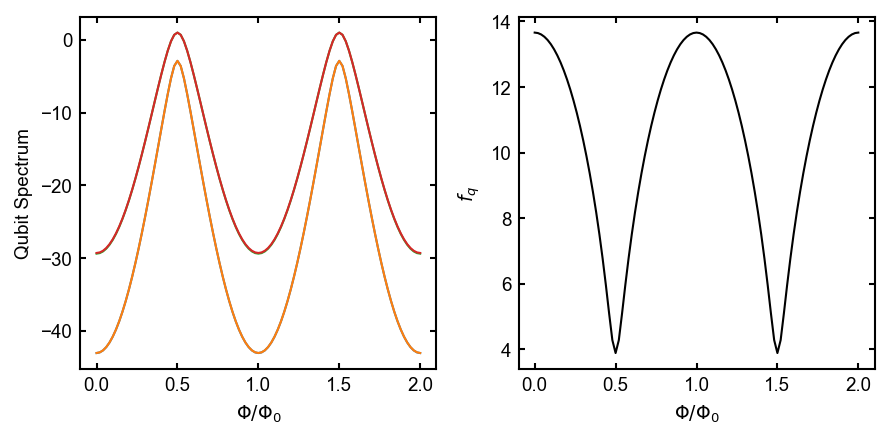

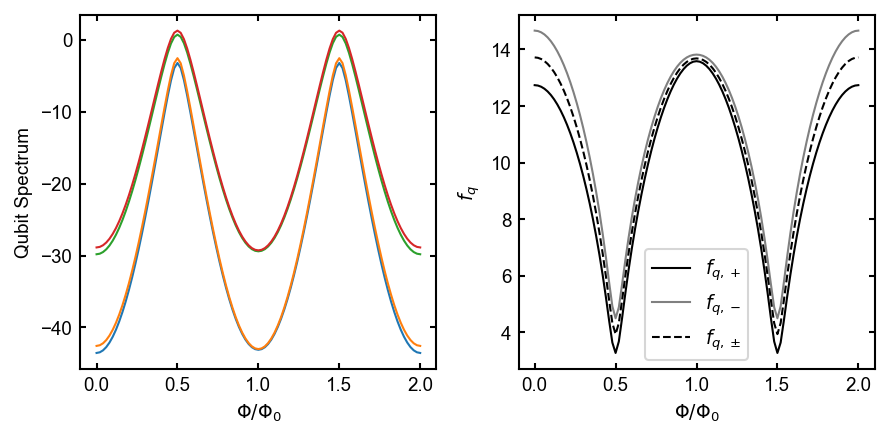

In [45]:
N=10
size = 10



n_bal = 1
tau_list = 0.95*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)

Ec = 0.5
Ej0 = 50
sc_gap = 50
d = 0.1
Em = 0.5

fig, axes = plt.subplots(1,2, figsize=(6,3))
fig1, axes1 = plt.subplots(1,2, figsize=(6,3))

ng = 0.5
fqs_SIS = []

fqs_p = []
fqs_m = []
fqs_pm = []
fqs_mp = []

spectrums_SIS = []
spectrums_SNS = []
spectrums_SIS_MBS = []
spectrums_SNS_MBS = []
for n in flux_n:
    #data_tot = SNS_squid_flux(n,phase,tau_list,tau_list,d=d,sc_gap=sc_gap) + SIS_squid_flux(n,phase,d=d,Ej0=Ej0) + E_m_squid_flux(n,phase)
    data_tot = SIS_squid_flux(n,phase,d=d,Ej0=Ej0) #E_m_squid_flux(n,phase)
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)    
    H = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, phase_shift=0, N=N) + H_M_SQUID(n, Em, d=d, N=N)
    Ens = H.eigenenergies()
    spectrums_SIS_MBS.append(Ens)
    fqs_p.append(Ens[2] - Ens[1])
    fqs_m.append(Ens[3] - Ens[0])
    fqs_pm.append(Ens[2] - Ens[0])
    fqs_mp.append(Ens[3] - Ens[1])

    data_tot = SIS_squid_flux(n,phase,d=d,Ej0=Ej0) #+ E_m_squid_flux(n,phase,d=d,Em=Em)
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)    
    H = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, phase_shift=0, N=N)
    Ens = H.eigenenergies()
    spectrums_SIS.append(Ens)
    fqs_SIS.append(Ens[2] - Ens[0])

plot_spectrum(flux_n, spectrums_SIS,cutoff=4, fig=fig, ax=axes[0])
axes[1].plot(flux_n, fqs_SIS, 'k')


plot_spectrum(flux_n, spectrums_SIS_MBS,cutoff=4, fig=fig1, ax=axes1[0])
axes1[1].plot(flux_n, fqs_p, 'k', label=r'$f_{{q,+}}$')
axes1[1].plot(flux_n, fqs_m, 'gray', label=r'$f_{{q,-}}$')
axes1[1].plot(flux_n, fqs_pm, 'k--', label=r'$f_{{q,\pm}}$')
#axes1[1].plot(flux_n, fqs_mp, 'k--', label=r'$f_{{q,\mp}}$')
axes1[1].legend()
#axes[0].plot(flux_n, spectrums_SIS, 'k')
#axes[0].plot(flux_n, fqs_SIS_1, 'k*')




axes[0].set_xlabel(r'$\Phi/\Phi_0$')
axes[1].set_xlabel(r'$\Phi/\Phi_0$')
axes1[0].set_xlabel(r'$\Phi/\Phi_0$')
axes1[1].set_xlabel(r'$\Phi/\Phi_0$')
axes[0].set_ylabel('Qubit Spectrum')
axes1[0].set_ylabel('Qubit Spectrum')
axes[1].set_ylabel(r'$f_q$')
axes1[1].set_ylabel(r'$f_q$')

fig.savefig('flux_tunable_transmon.pdf')
fig1.savefig('flux_tunable_Majorana_transmon.pdf')

In [165]:
spectrums_SIS

[array([-15.65669503, -15.65669308,  -7.24565058,  -7.24553162,
          0.57714155,   0.58035409,   7.69791258,   7.74698945,
         13.79729137,  14.23414122,  18.32254055,  20.29484319,
         22.03148508,  26.55365114,  26.93262732,  33.62632455,
         33.67314237,  41.7780551 ,  41.79338522,  51.02444597,
         51.03426137,  61.34788392,  61.60998026,  72.70854931,
         72.92326199,  85.27901065,  88.38702063,  98.66539054,
        101.61976957, 115.88578096, 131.17933035]),
 array([-15.62199912, -15.62199714,  -7.21973528,  -7.21961454,
          0.59413465,   0.5973907 ,   7.7054029 ,   7.75506176,
         13.79301754,  14.23392545,  18.30597231,  20.28909196,
         22.01298584,  26.54635349,  26.92100597,  33.61994091,
         33.66608587,  41.77295109,  41.78810821,  51.02038812,
         51.0300952 ,  61.34449407,  61.60478044,  72.70573104,
         72.91893443,  85.27536128,  88.37278061,  98.66227782,
        101.60640953, 115.87320588, 131.16745901]),
